# Coupled Cavity QED

$$\def\ket#1{\left|#1\right\rangle}
\def\timedel#1{\left(\tilde{t}-\tilde{\tau}_{#1}\right)}$$

## Model

A cavity of length $L$ and frequency $\omega_0$ is coupled to the outside world with a semitransparent mirror. The output field is reflected back from a perfectly reflecting mirror at distance $L'$. This induces a time-delayed feedback of the output signal into the cavity in the form

\begin{align}
G_k(t) = G_0\sin{(q_kL)}e^{i(\omega_0-\omega_k)t} = G_0(-1)^ke^{-i\omega_k^\prime t}
\end{align}
where
\begin{align}
\omega_k^\prime &= \frac{(2k+1)\pi}{\tau}\\
\tau &= \frac{2L}{c}
\end{align}

A two level system is interacting with the resonant cavity mode with a coupling strength $\gamma$. 
Everything is considered in the interaction picture, where the Hamiltonian can be expressed as
\begin{align}
H = -\hbar\gamma(\sigma^-a^\dagger + \sigma^+a) - \hbar\sum_{k=0}^\infty\left[G_k(t)a^\dagger d_k + G_k^*(t)d_k^\dagger a\right]
\end{align}

## One-excitation manifold

The considered wave function has the form
$$\ket{\psi}=c_e(t)\ket{e,0,\{0\}}+c_g(t)\ket{g,1,\{0\}}+\sum_kc_{g,k}(t)\ket{g,0,\{k\}}$$

## Equations of motion

\begin{align}
\partial_t c_e &= i\gamma c_g(t)\\
\partial_t c_g &= i\gamma c_e(t) - \underbrace{|G_0|^2\tau}_{2\kappa}\sum_{k=0}^{\infty}(-1)^kc_g(t-k\tau)\Theta(t-k\tau)
\end{align}


In [3]:
#%matplotlib inline
from math import *
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from pydelay import dde23

In [26]:
1/(np.pi)

0.3183098861837907

In [30]:
mycode = """
double f(int n, double tau, double t, double kap) {
    if(t>=n*tau)
        return exp(-kap*(t-n*tau));
    else
        return 0.0;
}
"""

eqnsSTmany = {
    'ce1:c' : '(ii*g1)*cg1 - gam*0.5*ce1',
    'ce2:c' : '(ii*g2)*cg2 - gam*0.5*ce2',
    'cg1:c' : '(ii*g1)*ce1 - kap1*cg1 - v1*4*(0.5*cg1*exp(-kapi*t) + cg1(t-tau)*f(1,tau,t,kapi)\
    + cg1(t-2*tau)*f(2,tau,t,kapi) + cg1(t-3*tau)*f(3,tau,t,kapi) + cg1(t-4*tau)*f(4,tau,t,kapi)\
    + cg1(t-5*tau)*f(5,tau,t,kapi) + cg1(t-6*tau)*f(6,tau,t,kapi) + cg1(t-7*tau)*f(7,tau,t,kapi)\
    + cg1(t-8*tau)*f(8,tau,t,kapi) + cg1(t-9*tau)*f(9,tau,t,kapi) + cg1(t-10*tau)*f(10,tau,t,kapi)\
    + cg1(t-11*tau)*f(11,tau,t,kapi) + cg1(t-12*tau)*f(12,tau,t,kapi) + cg1(t-13*tau)*f(13,tau,t,kapi)\
    + cg1(t-14*tau)*f(14,tau,t,kapi) + cg1(t-15*tau)*f(15,tau,t,kapi) + cg1(t-16*tau)*f(16,tau,t,kapi)\
    + cg1(t-17*tau)*f(17,tau,t,kapi) + cg1(t-18*tau)*f(18,tau,t,kapi) + cg1(t-19*tau)*f(19,tau,t,kapi)\
    + cg1(t-20*tau)*f(20,tau,t,kapi) + \
    r*(0.5*cg2*exp(-kapi*t) + cg2(t-tau)*f(1,tau,t,kapi) + cg2(t-2*tau)*f(2,tau,t,kapi)\
    + cg2(t-3*tau)*f(3,tau,t,kapi) + cg2(t-4*tau)*f(4,tau,t,kapi) + cg2(t-5*tau)*f(5,tau,t,kapi)\
    + cg2(t-6*tau)*f(6,tau,t,kapi) + cg2(t-7*tau)*f(7,tau,t,kapi) + cg2(t-8*tau)*f(8,tau,t,kapi) \
    + cg2(t-9*tau)*f(9,tau,t,kapi) + cg2(t-10*tau)*f(10,tau,t,kapi) + cg2(t-11*tau)*f(11,tau,t,kapi)\
    + cg2(t-12*tau)*f(12,tau,t,kapi) + cg2(t-13*tau)*f(13,tau,t,kapi) + cg2(t-14*tau)*f(14,tau,t,kapi) \
    + cg2(t-15*tau)*f(15,tau,t,kapi) + cg2(t-16*tau)*f(16,tau,t,kapi) + cg2(t-17*tau)*f(17,tau,t,kapi) \
    + cg2(t-18*tau)*f(18,tau,t,kapi) + cg2(t-19*tau)*f(19,tau,t,kapi) + cg2(t-20*tau)*f(20,tau,t,kapi)))',
    'cg2:c' : '(ii*g2)*ce2 - kap2*cg2 - v2*4*(1/r*(0.5*cg1*exp(-kapi*t) + cg1(t-tau)*f(1,tau,t,kapi)\
    + cg1(t-2*tau)*f(2,tau,t,kapi) + cg1(t-3*tau)*f(3,tau,t,kapi) + cg1(t-4*tau)*f(4,tau,t,kapi)\
    + cg1(t-5*tau)*f(5,tau,t,kapi) + cg1(t-6*tau)*f(6,tau,t,kapi) + cg1(t-7*tau)*f(7,tau,t,kapi)\
    + cg1(t-8*tau)*f(8,tau,t,kapi) + cg1(t-9*tau)*f(9,tau,t,kapi) + cg1(t-10*tau)*f(10,tau,t,kapi)\
    + cg1(t-11*tau)*f(11,tau,t,kapi) + cg1(t-12*tau)*f(12,tau,t,kapi) + cg1(t-13*tau)*f(13,tau,t,kapi)\
    + cg1(t-14*tau)*f(14,tau,t,kapi) + cg1(t-15*tau)*f(15,tau,t,kapi) + cg1(t-16*tau)*f(16,tau,t,kapi)\
    + cg1(t-17*tau)*f(17,tau,t,kapi) + cg1(t-18*tau)*f(18,tau,t,kapi) + cg1(t-19*tau)*f(19,tau,t,kapi)\
    + cg1(t-20*tau)*f(20,tau,t,kapi)) + \
    (0.5*cg2*exp(-kapi*t) + cg2(t-tau)*f(1,tau,t,kapi) + cg2(t-2*tau)*f(2,tau,t,kapi)\
    + cg2(t-3*tau)*f(3,tau,t,kapi) + cg2(t-4*tau)*f(4,tau,t,kapi) + cg2(t-5*tau)*f(5,tau,t,kapi)\
    + cg2(t-6*tau)*f(6,tau,t,kapi) + cg2(t-7*tau)*f(7,tau,t,kapi) + cg2(t-8*tau)*f(8,tau,t,kapi)\
    + cg2(t-9*tau)*f(9,tau,t,kapi) + cg2(t-10*tau)*f(10,tau,t,kapi) + cg2(t-11*tau)*f(11,tau,t,kapi)\
    + cg2(t-12*tau)*f(12,tau,t,kapi) + cg2(t-13*tau)*f(13,tau,t,kapi) + cg2(t-14*tau)*f(14,tau,t,kapi)\
    + cg2(t-15*tau)*f(15,tau,t,kapi) + cg2(t-16*tau)*f(16,tau,t,kapi) + cg2(t-17*tau)*f(17,tau,t,kapi)\
    + cg2(t-18*tau)*f(18,tau,t,kapi) + cg2(t-19*tau)*f(19,tau,t,kapi) + cg2(t-20*tau)*f(20,tau,t,kapi)))'
    }

paramsST = {
            'g1'   : 16.,
            'g2'   : 16.,
            'v1'   : 16.,
            'v2'   : 16.,
            'kap1' : 1.200000,
            'kap2' : 1.200000,
            'tau'  : pi/128.,
            'r'    : 1.,
            'gam'  : 5.2,
            'kapi' : 0.2
                        }


ddeSTmany = dde23(eqns=eqnsSTmany, params=paramsST, supportcode=mycode)
ddeSTmany.set_sim_params(tfinal=20*paramsST['tau'], dtmax=.001)

In [31]:
histfuncST = { 'ce1': lambda t: 1.,
              'ce2': lambda t: 0.,
              'cg1': lambda t: 0.,
              'cg2': lambda t: 0.
             }
ddeSTmany.hist_from_funcs(histfuncST, 51)

In [32]:
ddeSTmany.run()

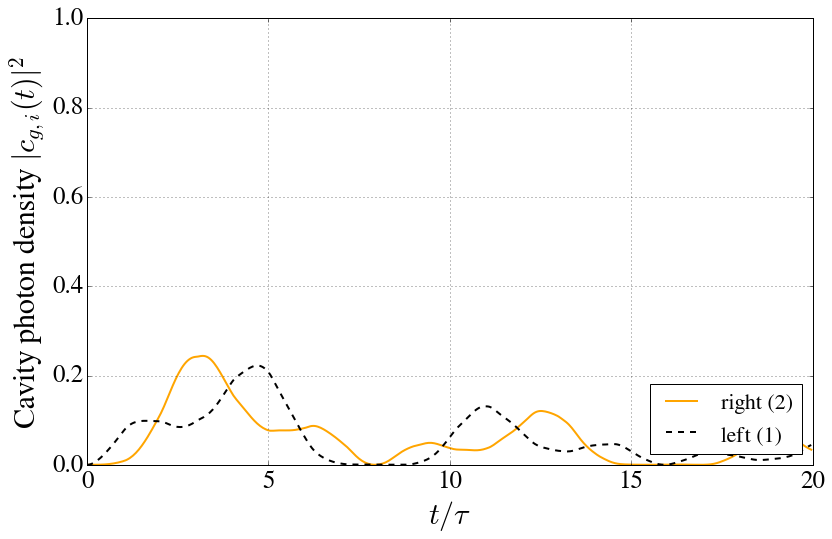

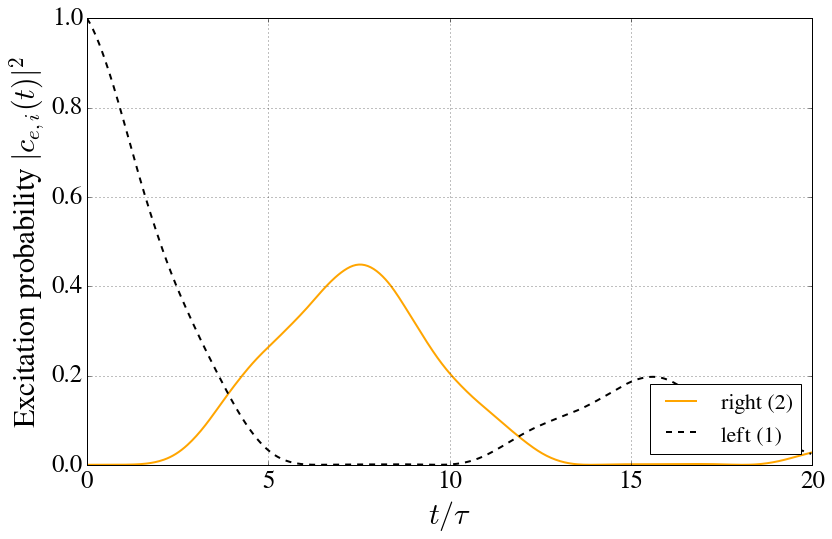

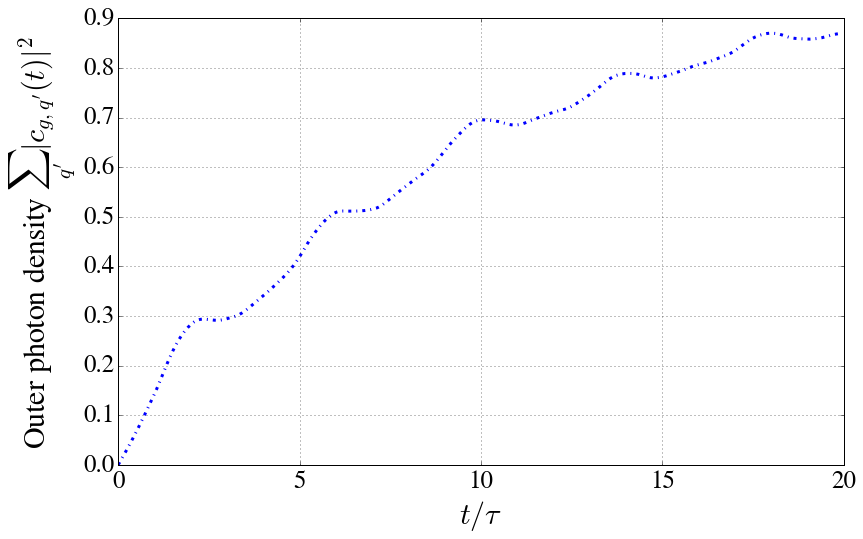

In [33]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=25)
mpl.rc('ytick',labelsize=25)

solmany = ddeSTmany.sample(0,20*paramsST['tau'],0.001)
tSTmany  = solmany['t']/paramsST['tau']
ce1STmany = solmany['ce1']
cg1STmany = solmany['cg1']
ce2STmany = solmany['ce2']
cg2STmany = solmany['cg2']

fsfont = {'fontname':'FreeSerif'}
plt.figure(1,figsize=(13,8))
plt.clf()
plt.plot(tSTmany,np.abs(cg2STmany)**2,linewidth=2.0,label='right (2)',color = 'orange')
plt.hold(True)
plt.plot(tSTmany,np.abs(cg1STmany)**2,linewidth=2.0,label='left (1)',color='k',ls='--')
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.ylim(0,1)
#plt.xlim(0,3)
plt.ylabel('Cavity photon density $|c_{g,i}(t)|^2$',fontsize=30.)
plt.legend(loc='lower right',fontsize = 22)
plt.grid(True)
plt.figure(2,figsize=(13,8))
plt.ylim(0,1)
plt.plot(tSTmany,np.abs(ce2STmany)**2,linewidth=2.0,label='right (2)',color = 'orange')
plt.hold(True)
plt.plot(tSTmany,np.abs(ce1STmany)**2,linewidth=2.0,label='left (1)',color='k',ls='--')
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.ylabel('Excitation probability $|c_{e,i}(t)|^2$',fontsize=30.)
plt.legend(loc='lower right',fontsize = 22)
#plt.xlim(0,3)
plt.grid(True)
plt.figure(3,figsize=(13,8))
plt.plot(tSTmany,1-(np.abs(ce1STmany)**2+np.abs(ce2STmany)**2+np.abs(cg1STmany)**2+np.abs(cg2STmany)**2),\
         linewidth=3.0,label='multi-delay',color='b',ls='-.')
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.ylabel('Outer photon density $\sum_{q^\prime}|c_{g,q^\prime}(t)|^2$',fontsize=30.)
#plt.legend(loc='upper right',fontsize = 22)
#plt.xlim(0,3)
plt.grid(True)
plt.show()

## Numerics

In [13]:
#Defining equations
import numpy as np
from scipy.integrate import ode

c = 2.13/2./np.pi*100.
tau = np.pi/128.
s = np.pi/(c*tau)
kap1 = 1.2
kap2 = 1.2
kapi = 0.2
g1 = 16.
g2 = 16.
gam = 5.2
v1  = 16.
v2  = 16.
G01 = 2*np.sqrt(v1/s/tau) #See notes for the connection between kappap and G0 (assumed to be real)
G02 = 2*np.sqrt(v2/s/tau) #See notes for the connection between kappap and G0 (assumed to be real)
N  = int(ceil(10*v1*tau/2.))*2

print(N)
qp = np.linspace(-N/2,N/2,N+1)
print(qp)

y0, t0 = [1.0, 0., 0.0, 0.0]+ np.zeros(N+1).tolist(), 0

#arg: 0->g1, 1->g2, 2->gam, 3->G01, 4->G02, 5->kap1, 6->kap2, 7->kapi, 8->s, 9->tau
def f(t, y, arg):
    qpcoef = (-1)**qp * np.exp(-1j*2*np.pi*qp*t/arg[9])
    return [1j*arg[0]*y[1]-arg[2]*0.5*y[0],\
            1j*arg[0]*y[0]-arg[5]*y[1]+1j*arg[3]*arg[8]*np.sum(qpcoef*y[4:N+5]),\
            1j*arg[1]*y[3]-arg[2]*0.5*y[2],\
            1j*arg[1]*y[2]-arg[6]*y[3]+1j*arg[4]*arg[8]*np.sum(qpcoef*y[4:N+5])] + \
(1j*np.conjugate(qpcoef)*(arg[3]*y[1]+arg[4]*y[3])-arg[7]*y[4:N+5]).tolist()
def jac(t, y, arg):
    qpcoef = (-1)**qp * np.exp(-1j*2*np.pi*qp*t/arg[9])
    jacobian = np.zeros((N+5,N+5),'complex')
    jacobian[0:2,0:2] = np.array([[-arg[2]*0.5,1j*arg[0]],[1j*arg[0],-arg[5]]])
    jacobian[0:2,2:4] = np.zeros((2,2))
    jacobian[2:4,0:2] = np.zeros((2,2))
    jacobian[2:4,2:4] = np.array([[-arg[2]*0.5,1j*arg[1]],[1j*arg[1],-arg[6]]])
    jacobian[0,4:N+5] = np.zeros(N+1)
    jacobian[1,4:N+5] = 1j*qpcoef*arg[3]*arg[8]
    jacobian[2,4:N+5] = np.zeros(N+1)
    jacobian[3,4:N+5] = 1j*qpcoef*arg[4]*arg[8]
    jacobian[4:N+5,0] = np.zeros(N+1)
    jacobian[4:N+5,1] = 1j*arg[2]*np.conjugate(qpcoef)
    jacobian[4:N+5,2] = np.zeros(N+1)
    jacobian[4:N+5,3] = 1j*arg[3]*np.conjugate(qpcoef)
    jacobian[4:N+5,4:N+5] = -arg[7]*np.diag(np.ones(N+1))
    #print(jacobian)
    return jacobian.tolist()

4
[-2. -1.  0.  1.  2.]


/home/nnem614/Documents/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in sqrt


In [11]:
r = ode(f, jac).set_integrator('zvode', method='bdf', with_jacobian=True)
#arg: 0->g1, 1->g2, 2->gam, 3->G01, 4->G02, 5->kap1, 6->kap2, 7->kapi, 8->s, 9->tau
arg = [g1,g2,gam,G01,G02,kap1,kap2,kapi,s,tau]
r.set_initial_value(y0, t0).set_f_params(arg).set_jac_params(arg)
t1 = 20.*tau
dt = 0.001

time = np.array([t0/tau])
#print(time)
sol  = np.array([y0])
#print(sol)
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    #print(r.t/arg[2])
    #print(r.y)
    time = np.append(time, np.array([r.t/tau]), axis=0)
    sol  = np.append(sol, np.array([r.y]), axis=0)

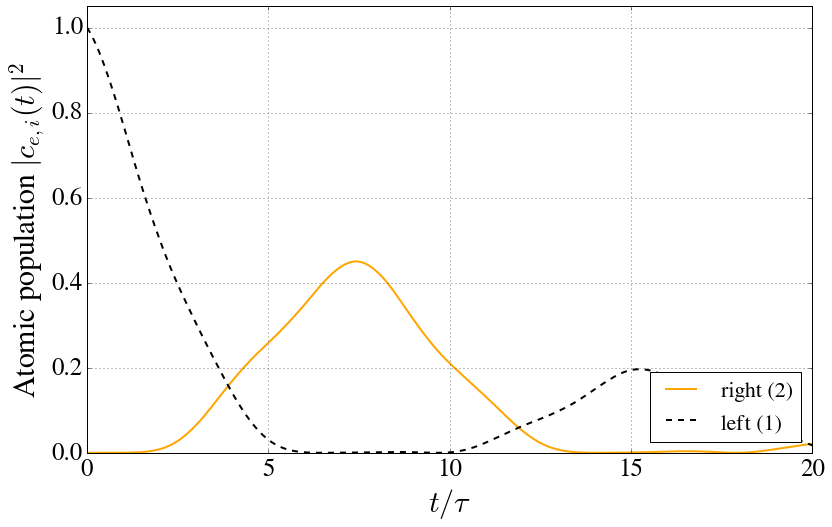

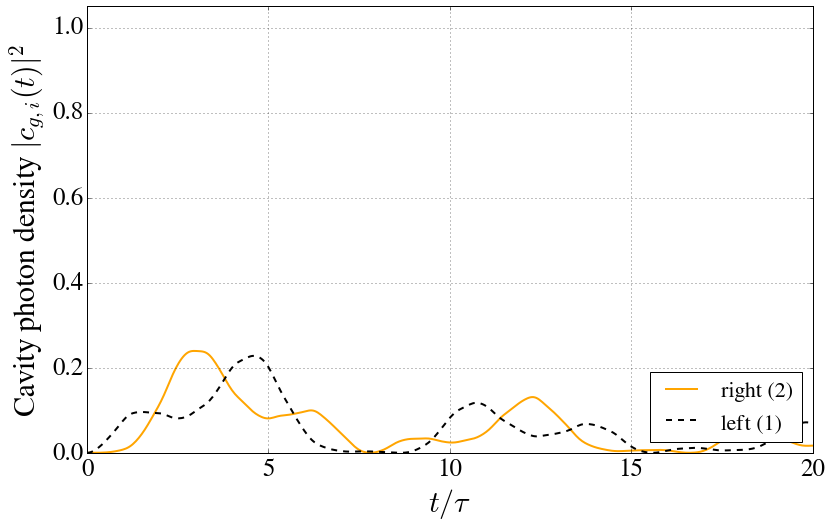

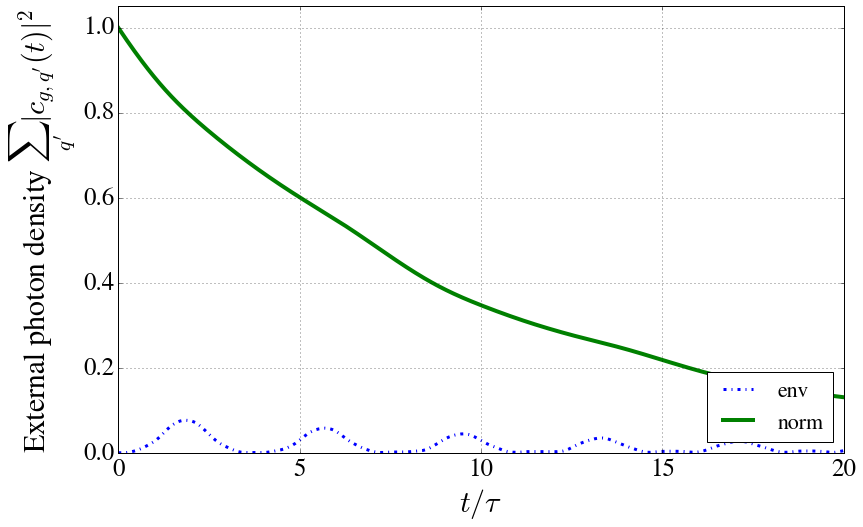

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=25)
mpl.rc('ytick',labelsize=25)

env = np.zeros(len(time))
for ti in range(0,len(time)):
    env[ti] = s*np.sum(np.abs(sol[ti,4:(N+5)])**2)
fsfont = {'fontname':'FreeSerif'}
plt.figure(1,figsize=(13,8))
plt.clf()
plt.ylim(0,1.05)
plt.plot(time,np.abs(sol[:,2])**2,linewidth=2.0,label='right (2)',color = 'orange')
plt.hold(True)
plt.plot(time,np.abs(sol[:,0])**2,linewidth=2.0,label='left (1)',color='k',ls='--')
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.xlim(0,20)
plt.ylabel('Atomic population $|c_{e,i}(t)|^2$',fontsize=30.)
plt.legend(loc='lower right',fontsize = 22)
plt.grid(True)
plt.figure(2,figsize=(13,8))
plt.clf()
plt.ylim(0,1.05)
plt.plot(time,np.abs(sol[:,3])**2,linewidth=2.0,label='right (2)',color = 'orange')
plt.hold(True)
plt.plot(time,np.abs(sol[:,1])**2,linewidth=2.0,label='left (1)',color='k',ls='--')
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.xlim(0,20)
plt.ylabel('Cavity photon density $|c_{g,i}(t)|^2$',fontsize=30.)
plt.legend(loc='lower right',fontsize = 22)
plt.grid(True)
plt.figure(3,figsize=(13,8))
plt.clf()
plt.plot(time,env,linewidth=3.0,label='env',color = 'blue', ls="-.")
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.xlim(0,20)
#plt.ylabel('Larger cavity photon density $\sum_{q^\prime}|c_{g,q^\prime}(t)|^2$',fontsize=30.)
#plt.legend(loc='upper right',fontsize = 22)
plt.grid(True)

#plt.figure(4,figsize=(13,8))
#plt.clf()
plt.ylim(0,1.05)
plt.hold(True)
plt.plot(time,env+np.abs(sol[:,1])**2+np.abs(sol[:,0])**2+np.abs(sol[:,2])**2+np.abs(sol[:,3])**2\
         ,linewidth=4.0,label='norm',color = 'green')
plt.xlabel('$t/\\tau$',fontsize=30.)
#plt.xlim(0,3)
plt.ylabel('External photon density $\sum_{q^\prime}|c_{g,q^\prime}(t)|^2$',fontsize=30.)
plt.legend(loc='lower right',fontsize = 22)
#plt.grid(True)
plt.show()

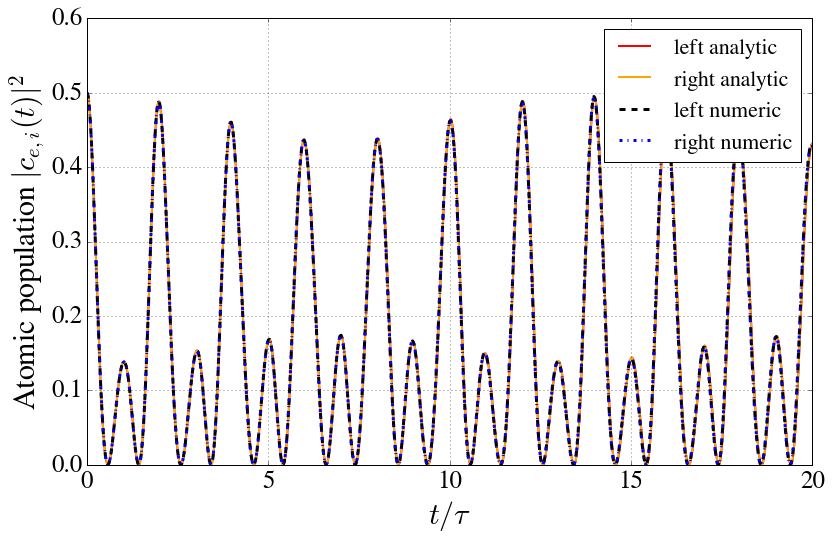

In [146]:
plt.figure(1,figsize=(13,8))
plt.clf()
plt.plot(tSTmany,np.abs(ce1STmany)**2,linewidth=2.0,label='left analytic',color='red',ls='-')
plt.hold(True)
plt.plot(tSTmany,np.abs(ce2STmany)**2,linewidth=2.0,label='right analytic',color = 'orange')
plt.plot(time,np.abs(sol[:,0])**2,linewidth=3.0,label='left numeric',color='k',ls='--')
plt.plot(time,np.abs(sol[:,2])**2,linewidth=3.0,label='right numeric',color = 'blue',ls="-.")
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.xlim(0,20)
plt.ylabel('Atomic population $|c_{e,i}(t)|^2$',fontsize=30.)
plt.legend(loc='upper right',fontsize = 22)
plt.grid(True)


## Spontaneous emission spectra

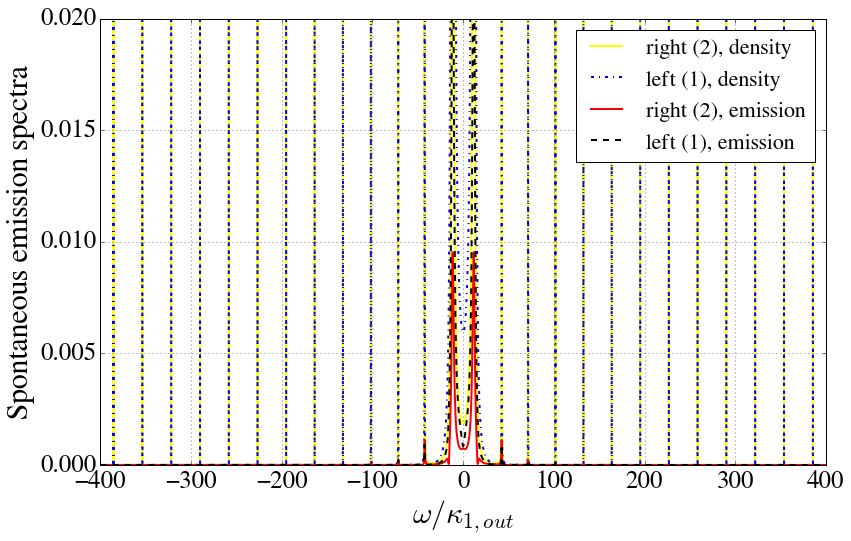

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=25)
mpl.rc('ytick',labelsize=25)

kapi = 0.2
kap1 = 1.+kapi
kap2 = 1.+kapi
g1   = 16.
g2   = 8.
v1   = 16.
v2   = 16.
r    = 1.
gam  = 5.2
tau  = np.pi/16.
om   = np.linspace(-400,400,10000001)

xi10 = 1.
xi20 = 0.

D1L  = (kap1-1j*om)*(gam/2.-1j*om) + 4*v1*(gam/2.-1j*om)*(1/(1-np.exp(-(kapi-1j*om)*tau))-.5) + g1**2
D2L  = (kap2-1j*om)*(gam/2.-1j*om) + 4*v2*(gam/2.-1j*om)*(1/(1-np.exp(-(kapi-1j*om)*tau))-.5) + g2**2
KL   = (gam/2.-1j*om)*(1/(1-np.exp(-(kapi-1j*om)*tau))-.5)
D1   = (-1j*om)*(-1j*om) + 4*v1*(-1j*om)*(1/(1-np.exp(1j*om*tau))-.5) + g1**2
D2   = (-1j*om)*(-1j*om) + 4*v2*(-1j*om)*(1/(1-np.exp(1j*om*tau))-.5) + g2**2
K    = (-1j*om)*(1/(1-np.exp(1j*om*tau))-.5)
detL = D1L*D2L - 16*v1*v2*KL**2
det  = D1*D2 - 16*v1*v2*K**2

cg1  = 1/det * ( 1j*g1*D1*xi10 - 1j*g2*4*v1*r*K*xi20 )
cg2  = 1/det * ( -1j*g1*4*v2/r*K*xi10 + 1j*g2*D1*xi20)
cg1L = 1/detL * ( 1j*g1*D1L*xi10 - 1j*g2*4*v1*r*KL*xi20 )
cg2L = 1/detL * ( -1j*g1*4*v2/r*KL*xi10 + 1j*g2*D1L*xi20)

plt.figure(1,figsize=(13,8))
plt.clf()
plt.ylim(0,0.02)
#plt.xlim(-500,500)
plt.plot(om,np.abs(cg2)**2,linewidth=2.0,label='right (2), density',color = 'yellow')
plt.hold(True)
plt.plot(om,np.abs(cg1)**2,linewidth=2.0,label='left (1), density',color='b',ls='-.')
plt.plot(om,(kap2-kapi)/np.pi*np.abs(cg2L)**2,linewidth=2.0,label='right (2), emission',color = 'r')
plt.plot(om,(kap1-kapi)/np.pi*np.abs(cg1L)**2,linewidth=2.0,label='left (1), emission',color='k',ls='--')
plt.xlabel('$\omega/\kappa_{1,out}$',fontsize=30.)
plt.ylabel('Spontaneous emission spectra',fontsize=30.)
plt.legend(loc='upper right',fontsize = 22)
plt.grid(True)

plt.show()

## Reflection and transmission spectra

/home/nnem614/Documents/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in divide


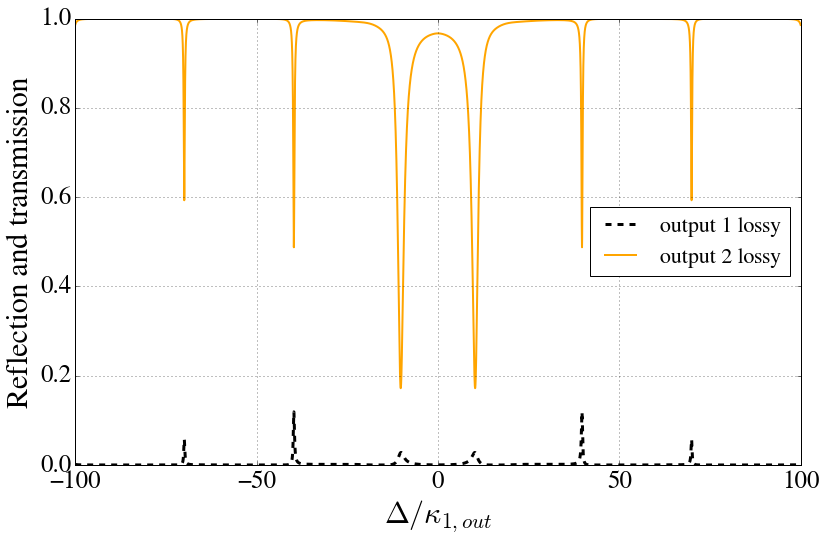

In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=25)
mpl.rc('ytick',labelsize=25)

kapi = 0.2
kap1 = 1.+kapi
kap2 = 1.+kapi
g1   = 16.
g2   = 8.
r    = 1.
gam  = 5.2
tau  = np.pi/16.
Del  = np.linspace(-100,100,1000001)
v1   = 16.*(np.cos(Del*tau/2))**2
v2   = 16.*(np.cos(Del*tau/2))**2

Ep1  = 0.0
Ep2  = 0.25

KL   = (gam/2.+1j*Del)*(1+np.exp(-(kapi+1j*Del)*tau))/(1-np.exp(-(kapi+1j*Del)*tau))
M1L  = (kap1+1j*Del)*(gam/2.+1j*Del) + 2*v1*KL + g1**2
M2L  = (kap2+1j*Del)*(gam/2.+1j*Del) + 2*v2*KL + g2**2
detL = M1L*M2L - 4*v1*v2*KL**2
K    = (1j*Del)*(1+np.exp(-(1j*Del)*tau))/(1-np.exp(-(1j*Del)*tau))
M1   = (kap1-kapi+1j*Del)*(1j*Del) + 2*v1*K + g1**2
M2   = (kap2-kapi+1j*Del)*(1j*Del) + 2*v2*K + g2**2
det  = M1*M2 - 4*v1*v2*K**2

al1L = -1j/detL * ( M2L*Ep1 - 2*v1*r*KL*Ep2 ) * (gam/2+1j*Del)
al2L = -1j/detL * ( -2*v2/r*KL*Ep1 + M1L*Ep2 ) * (gam/2+1j*Del)
al1  = -1j/det * ( M2*Ep1 - 2*v1*r*K*Ep2 ) * (1j*Del)
al2  = -1j/det * ( -2*v2/r*K*Ep1 + M1*Ep2 ) * (1j*Del)

a1in = 1j*Ep1/np.sqrt(2*(kap1-kapi))
a2in = 1j*Ep2/np.sqrt(2*(kap2-kapi))

C1  = np.abs(a1in+np.sqrt(2*(kap1-kapi))*al1)**2/(np.abs(a1in)**2+np.abs(a2in)**2)
C2  = np.abs(a2in+np.sqrt(2*(kap2-kapi))*al2)**2/(np.abs(a1in)**2+np.abs(a2in)**2)
C1L = np.abs(a1in+np.sqrt(2*(kap1-kapi))*al1L)**2/(np.abs(a1in)**2+np.abs(a2in)**2)
C2L = np.abs(a2in+np.sqrt(2*(kap2-kapi))*al2L)**2/(np.abs(a1in)**2+np.abs(a2in)**2)

plt.figure(1,figsize=(13,8))
plt.clf()
#plt.ylim(0,1)
#plt.xlim(-500,500)
#plt.plot(om,C1,linewidth=2.0,label='output 1',color='yellow',ls='--')
plt.hold(True)
#plt.plot(om,C2,linewidth=3.0,label='output 2',color='b',ls='-.')
plt.plot(Del,C1L,linewidth=3.0,label='output 1 lossy',color='k',ls='--')
plt.plot(Del,C2L,linewidth=2.0,label='output 2 lossy',color = 'orange')
#plt.plot(om,C2+C1,linewidth=4.0,label='sum',color='k',ls=':')
#plt.plot(om,(kap2-kapi)/np.pi*np.abs(cg2L)**2,linewidth=2.0,label='right (2), emission',color = 'r')
#plt.plot(om,(kap1-kapi)/np.pi*np.abs(cg1L)**2,linewidth=2.0,label='left (1), emission',color='k',ls='--')
plt.xlabel('$\Delta/\kappa_{1,out}$',fontsize=30.)
plt.ylabel('Reflection and transmission',fontsize=30.)
plt.legend(loc='center right',fontsize = 22)
plt.grid(True)

plt.show()

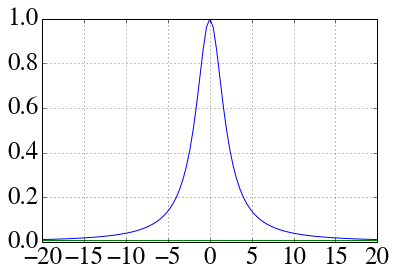

In [70]:
x = np.linspace(-20,20,101)
cs = 2.
f = 4/(x**2+cs**2)
plt.plot(x,f)
plt.hold(True)
plt.plot(x,.01*(x-100.)/(x-100.))
plt.grid(True)

## Normal modes

In [49]:
import sympy as sym
sym.init_printing()

g1,g2,G1,G2 = sym.symbols("g_1 g_2 G_1 G_2",real="True")
M = sym.Matrix([[0, g1, 0, 0, 0, 0, 0],\
               [g1, 0, 0, 0, G1, -G1, G1],\
               [0, 0, 0, g2, 0, 0, 0],\
               [0, 0, g2, 0, G1, -G1, G1],\
               [0, G1, 0, G1, 0, 0, 0],\
               [0, -G1, 0, -G1, 0, 0, 0],\
               [0, G1, 0, G1, 0, 0, 0]])
#sym.simplify(M.eigenvects())

## Nonlinear semiclassical model

In [61]:
#Defining equations
from math import *
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy.integrate import ode

Ep1 = 10.
Ep2 = 0.
c = 2.13/2./np.pi*100.
tau = np.pi/2.
s = np.pi/(c*tau)
kap1 = 1.2
kap2 = 1.2
kapi = 0.2
g1 = 10.
g2 = 10.
gam = 5.2
v1  = 10.
v2  = 10.
G01 = 2*np.sqrt(v1/s/tau) #See notes for the connection between kappap and G0 (assumed to be real)
G02 = 2*np.sqrt(v2/s/tau) #See notes for the connection between kappap and G0 (assumed to be real)
N  = int(ceil(10*v1*tau/2.))*2

print(N)
qp = np.linspace(-N/2,N/2,N+1)
print(qp)

y0, t0 = [0.0, 0., -1.0, 0.0,0.0,-1.0]+ np.zeros(N+1).tolist(), 0

#y: 0->a1, 1->s1m, 2->s1z, 3->a2, 4->s2m, 5->s2z, 6-N+7->dqp
#arg: 0->g1, 1->g2, 2->gam, 3->G01, 4->G02, 5->kap1, 6->kap2, 7->kapi, 8->s, 9->tau, 10->Ep1, 10->Ep2
def f(t, y, arg):
    qpcoef = (-1)**qp * np.exp(-1j*2*np.pi*qp*t/arg[9])
    return [1j*arg[0]*y[1]-arg[5]*y[0]+1j*arg[3]*arg[8]*np.sum(qpcoef*y[6:N+7])-1j*arg[10],\
            -1j*arg[0]*y[0]*y[2]-arg[2]*0.5*y[1],\
            2*1j*arg[0]*(y[0]*np.conjugate(y[1])-np.conjugate(y[0])*y[1])-arg[2]*(y[2]+1),\
            1j*arg[1]*y[4]-arg[6]*y[3]+1j*arg[4]*arg[8]*np.sum(qpcoef*y[6:N+7])-1j*arg[11],\
            -1j*arg[1]*y[3]*y[5]-arg[2]*0.5*y[4],\
            2*1j*arg[1]*(y[3]*np.conjugate(y[4])-np.conjugate(y[3])*y[4])-arg[2]*(y[5]+1)] + \
        (1j*np.conjugate(qpcoef)*(arg[3]*y[0]+arg[4]*y[3])-arg[7]*y[6:N+7]).tolist()
def jac(t, y, arg):
    qpcoef = (-1)**qp * np.exp(-1j*2*np.pi*qp*t/arg[9])
    jacobian = np.zeros((N+7,N+7),'complex')
    jacobian[0:3,0:3] = np.array([[-arg[5],1j*arg[0],0],\
                                 [-1j*arg[0]*y[2],-arg[2]*0.5,1j*arg[0]*y[0]],\
                                 [2*1j*arg[0]*np.conjugate(y[1]),-2*1j*arg[0]*np.conjugate(y[0]),-arg[2]]])
    jacobian[0:3,3:6] = np.zeros((3,3))
    jacobian[3:6,0:3] = np.zeros((3,3))
    jacobian[3:6,3:6] = np.array([[-arg[6],1j*arg[1],0],\
                                 [-1j*arg[1]*y[5],-arg[2]*0.5,1j*arg[1]*y[3]],\
                                 [2*1j*arg[1]*np.conjugate(y[4]),-2*1j*arg[1]*np.conjugate(y[3]),-arg[2]]])
    jacobian[0,6:N+7] = 1j*qpcoef*arg[3]*arg[8]
    jacobian[1:3,6:N+7] = np.zeros((2,(N+1)))
    jacobian[3,6:N+7] = 1j*qpcoef*arg[4]*arg[8]
    jacobian[4:6,6:N+7] = np.zeros((2,(N+1)))
    jacobian[6:N+7,0] = 1j*arg[2]*np.conjugate(qpcoef)
    jacobian[6:N+7,1:3] = np.zeros(((N+1),2))
    jacobian[6:N+7,3] = 1j*arg[3]*np.conjugate(qpcoef)
    jacobian[6:N+7,4:6] = np.zeros(((N+1),2))
    jacobian[6:N+7,6:N+7] = -arg[7]*np.diag(np.ones(N+1))
    #print(jacobian)
    return jacobian.tolist()

158
[-79. -78. -77. -76. -75. -74. -73. -72. -71. -70. -69. -68. -67. -66. -65.
 -64. -63. -62. -61. -60. -59. -58. -57. -56. -55. -54. -53. -52. -51. -50.
 -49. -48. -47. -46. -45. -44. -43. -42. -41. -40. -39. -38. -37. -36. -35.
 -34. -33. -32. -31. -30. -29. -28. -27. -26. -25. -24. -23. -22. -21. -20.
 -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.
  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.
  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.
  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.
  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.]


In [62]:
r = ode(f, jac).set_integrator('zvode', method='bdf', with_jacobian=True)
#arg: 0->g1, 1->g2, 2->gam, 3->G01, 4->G02, 5->kap1, 6->kap2, 7->kapi, 8->s, 9->tau
arg = [g1,g2,gam,G01,G02,kap1,kap2,kapi,s,tau,Ep1,Ep2]
r.set_initial_value(y0, t0).set_f_params(arg).set_jac_params(arg)
t1 = 20.*tau
dt = 0.001

time = np.array([t0/tau])
#print(time)
sol  = np.array([y0])
#print(sol)
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    #print(r.t/arg[2])
    #print(r.y)
    time = np.append(time, np.array([r.t/tau]), axis=0)
    sol  = np.append(sol, np.array([r.y]), axis=0)

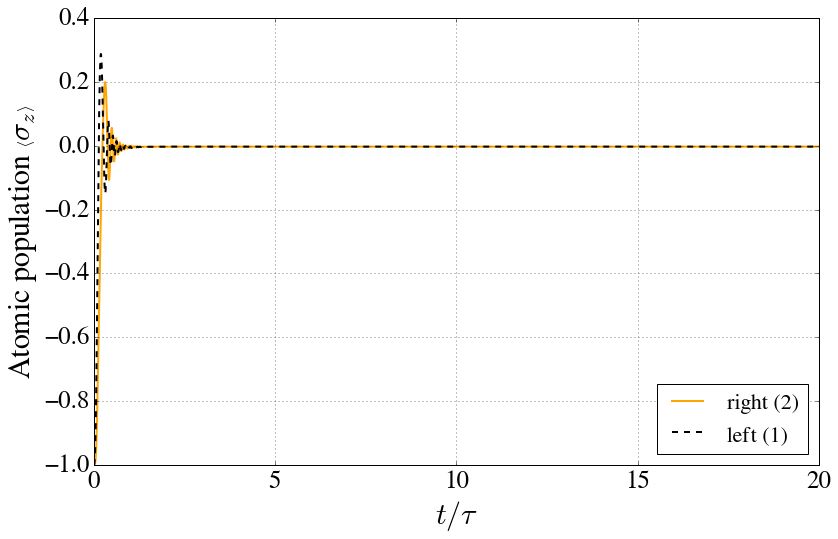

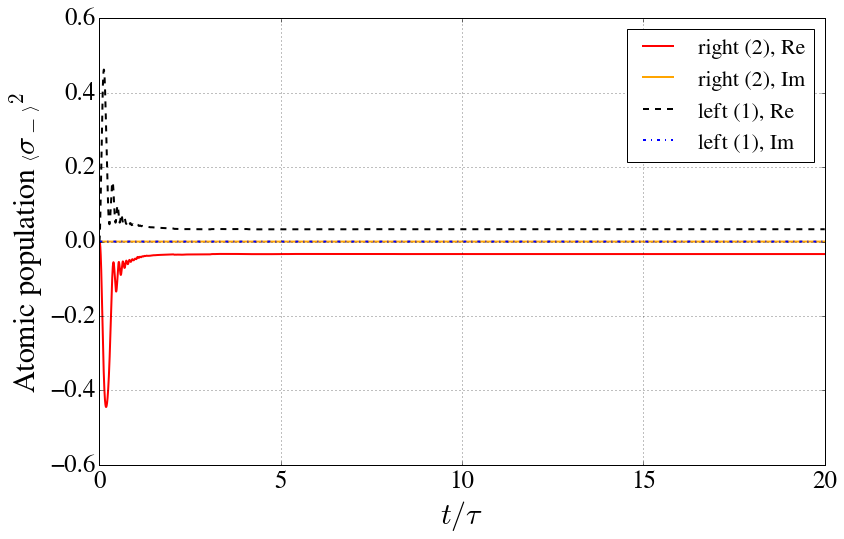

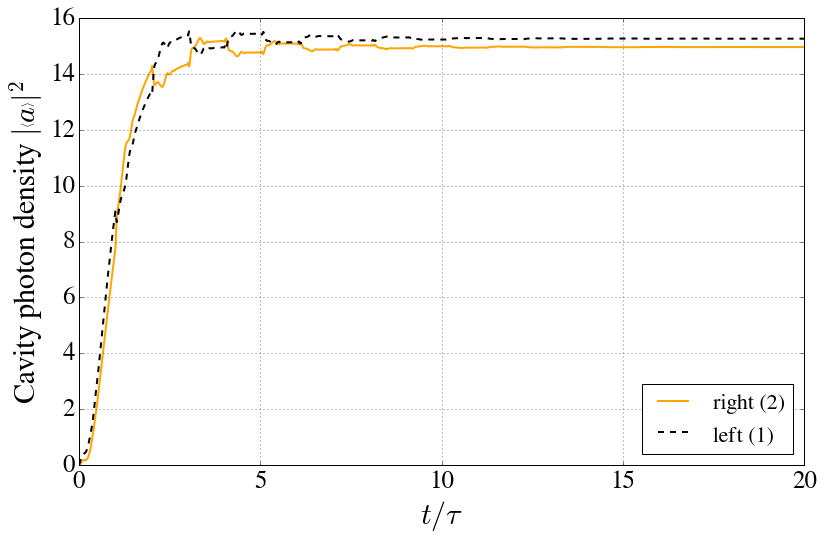

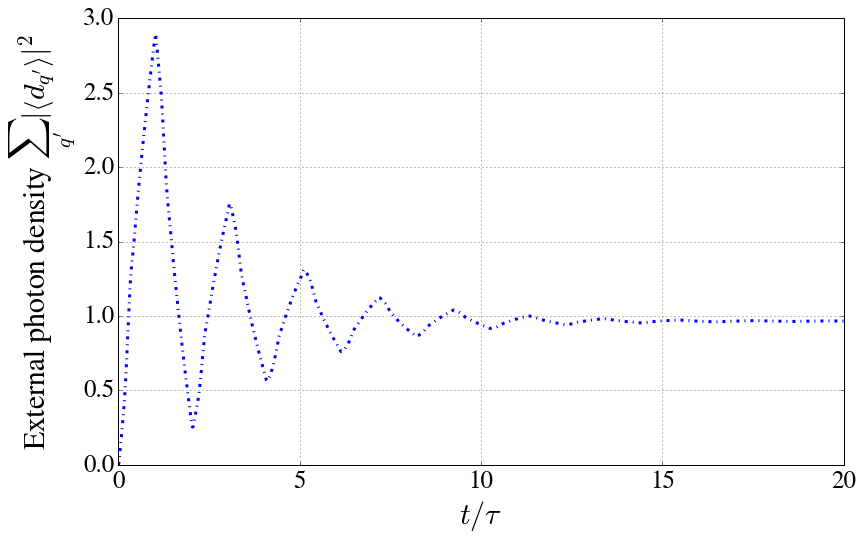

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=25)
mpl.rc('ytick',labelsize=25)

env = np.zeros(len(time))
for ti in range(0,len(time)):
    env[ti] = s*np.sum(np.abs(sol[ti,6:(N+7)])**2)
fsfont = {'fontname':'FreeSerif'}
plt.figure(1,figsize=(13,8))
plt.clf()
#plt.ylim(-.01,.01)
plt.plot(time,sol[:,5],linewidth=2.0,label='right (2)',color = 'orange')
plt.hold(True)
plt.plot(time,sol[:,2],linewidth=2.0,label='left (1)',color='k',ls='--')
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.xlim(0,20)
plt.ylabel('Atomic population $\left<\sigma_z\\right>$',fontsize=30.)
plt.legend(loc='lower right',fontsize = 22)
plt.grid(True)
plt.figure(2,figsize=(13,8))
plt.clf()
#plt.ylim(0,1.0)
plt.plot(time,np.real(sol[:,4]),linewidth=2.0,label='right (2), Re',color = 'red')
plt.hold(True)
plt.plot(time,np.imag(sol[:,4]),linewidth=2.0,label='right (2), Im',color = 'orange')
plt.plot(time,np.real(sol[:,1]),linewidth=2.0,label='left (1), Re',color='k',ls='--')
plt.plot(time,np.imag(sol[:,1]),linewidth=2.0,label='left (1), Im',color='b',ls='-.')
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.xlim(0,20)
plt.ylabel('Atomic population $\left<\sigma_-\\right>^2$',fontsize=30.)
plt.legend(loc='upper right',fontsize = 22)
plt.grid(True)
plt.figure(3,figsize=(13,8))
plt.clf()
#plt.ylim(0,1.05)
plt.plot(time,np.abs(sol[:,3])**2,linewidth=2.0,label='right (2)',color = 'orange')
plt.hold(True)
plt.plot(time,np.abs(sol[:,0])**2,linewidth=2.0,label='left (1)',color='k',ls='--')
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.xlim(0,20)
plt.ylabel('Cavity photon density $|\left<a\\right>|^2$',fontsize=30.)
plt.legend(loc='lower right',fontsize = 22)
plt.grid(True)
plt.figure(4,figsize=(13,8))
plt.clf()
plt.plot(time,env,linewidth=3.0,label='env',color = 'blue', ls="-.")
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.xlim(0,20)
#plt.ylabel('Larger cavity photon density $\sum_{q^\prime}|c_{g,q^\prime}(t)|^2$',fontsize=30.)
#plt.legend(loc='upper right',fontsize = 22)
plt.grid(True)

#plt.figure(4,figsize=(13,8))
#plt.clf()
#plt.ylim(0,1.05)
#plt.hold(True)
#plt.plot(time,env+np.abs(sol[:,1])**2+np.abs(sol[:,0])**2+np.abs(sol[:,2])**2+np.abs(sol[:,3])**2\
#         ,linewidth=4.0,label='norm',color = 'green')
plt.xlabel('$t/\\tau$',fontsize=30.)
#plt.xlim(0,3)
plt.ylabel('External photon density $\sum_{q^\prime}|\left<d_{q^\prime}\\right>|^2$',fontsize=30.)
#plt.legend(loc='lower right',fontsize = 22)
#plt.grid(True)
plt.show()